In [1]:
# TensorFLow is a data provider for MNIST.
import pandas as pd
import numpy as np
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow_datasets as tfds
%matplotlib inline

sns.set()

Fetch of MNIST dataset

In [6]:
#loading the mnist dataset from tensorflow keras datasets
from tensorflow.keras.datasets import mnist
(pdata, qdata), (ptest, qtest) = mnist.load_data()

Display and examination of the MNIST dataset

In [7]:
# dividing the data into data variables and test variables
len(pdata), len(ptest), len(qdata), len(qtest)

(60000, 10000, 60000, 10000)

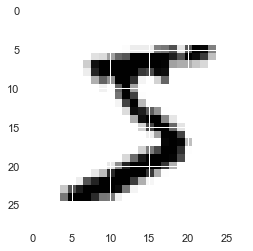

In [9]:
#fetching the 1st image
image1 = pdata[0] 
fig1 = plt.figure
plt.imshow(image1, cmap='binary')
plt.show()

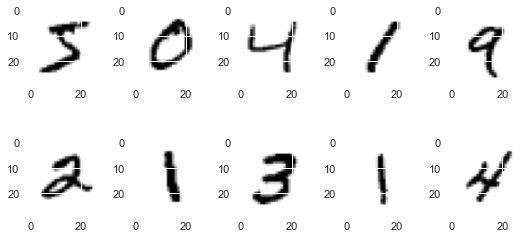

In [19]:
#displaying the 10 images of the datasets
r = 2
c = 5 #plot images
i = 0
figs, axes = plt.subplots(r, c, figsize=(1.5*c,2*r))
for i in range(10):  
    axis = axes[i//c, i%c]
    axis.imshow(pdata[i], cmap='binary')
plt.tight_layout()
plt.show()

Train a Stochastic Gradient Descent (SGD) binary classifier

In [20]:
#importing the SGFclassifier from sklearn
from sklearn.linear_model import SGDClassifier 
sgd_classifier = SGDClassifier(random_state = 1)

In [35]:
#classifier 9
Q_Data_9 = (qdata == 9)
Q_Test_9 = (qtest == 9)
#converting it into 2D array so as to match it with the Y
pdata = pdata.reshape(60000,784)

In [36]:
 #fitting the model
sgd_classifier.fit(pdata,Q_Data_9)

SGDClassifier(random_state=1)

Determine the precision of your SGD classifier using a Confusion matrix

In [37]:
#predict a variable which is dependent
from sklearn.model_selection import cross_val_predict
#define predict
Q_Data_predict = cross_val_predict(sgd_classifier,pdata,Q_Data_9, cv = 4)
#importing confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(Q_Data_9,Q_Data_predict)  

array([[52573,  1478],
       [ 1493,  4456]], dtype=int64)

In [38]:
#import the precision and recall scores
from sklearn.metrics import precision_score,recall_score
precision_score = precision_score(Q_Data_9,Q_Data_predict)
recall_score = recall_score(Q_Data_9,Q_Data_predict)
print(f"recall score = {round(recall_score*100,2)} & precision score = {round(precision_score*100,2)}")

recall score = 74.9 & precision score = 75.09
